## Предвидете ја вредноста Close (BTC) земајќи ја во предвид вредноста на оваа колона во изминатите четири дена
Hint : внимавајте како ќе го поделите множеството на train и test бидејќи се работи податоци во временска серија

##Симнете го податочното множество

In [ ]:
!gdown 14YlgjT_M8kDrvDKEv864fs7ZyI1lMErO

Downloading...
From: https://drive.google.com/uc?id=14YlgjT_M8kDrvDKEv864fs7ZyI1lMErO
To: /content/crypto_data.csv
100% 90.0k/90.0k [00:00<00:00, 52.7MB/s]


##Направете претпроцесирање на податоците

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
df = pd.read_csv('/content/crypto_data.csv')

In [ ]:
df.head()

,Date,Close (BNB),Close (BTC),Close (USDT),Close (ETH)
0,09-11-17,1.99077,7143.580078,1.00818,320.884003
1,10-11-17,1.79684,6618.140137,1.00601,299.252991
2,11-11-17,1.67047,6357.600098,1.00899,314.681000
3,12-11-17,1.51969,5950.069824,1.01247,307.907990
4,13-11-17,1.68662,6559.490234,1.00935,316.716003


In [ ]:
df.describe

<bound method NDFrame.describe of           Date  Close (BNB)   Close (BTC)  Close (USDT)  Close (ETH)
0     09-11-17      1.99077   7143.580078       1.00818   320.884003
1     10-11-17      1.79684   6618.140137       1.00601   299.252991
2     11-11-17      1.67047   6357.600098       1.00899   314.681000
3     12-11-17      1.51969   5950.069824       1.01247   307.907990
4     13-11-17      1.68662   6559.490234       1.00935   316.716003
...        ...          ...           ...           ...          ...
1748  23-08-22    299.03000  21528.090000       1.00000  1662.770000
1749  24-08-22    296.45000  21395.020000       1.00000  1657.060000
1750  25-08-22    301.58000  21600.900000       1.00010  1696.460000
1751  26-08-22    279.60000  20260.020000       1.00000  1507.780000
1752  27-08-22    277.30000  20029.790000       1.00000  1470.760000

[1753 rows x 5 columns]>

##Поделето го на тренирачко и тестирачко множество во сооднос 80:20

In [ ]:
for i in range(1, 5):
    df[f'Close (BTC)_lag_{i}'] = df['Close (BTC)'].shift(i)

df.dropna(inplace=True)

X = df[[f'Close (BTC)_lag_{i}' for i in range(1, 5)]]
y = df['Close (BTC)']

In [ ]:
df

,Date,Close (BNB),Close (BTC),Close (USDT),Close (ETH),Close (BTC)_lag_1,Close (BTC)_lag_2,Close (BTC)_lag_3,Close (BTC)_lag_4
4,13-11-17,1.68662,6559.490234,1.00935,316.716003,5950.069824,6357.600098,6618.140137,7143.580078
5,14-11-17,1.59258,6635.750000,1.00683,337.631012,6559.490234,5950.069824,6357.600098,6618.140137
6,15-11-17,1.53045,7315.540039,1.00318,333.356995,6635.750000,6559.490234,5950.069824,6357.600098
7,16-11-17,1.57792,7871.689941,1.00212,330.924011,7315.540039,6635.750000,6559.490234,5950.069824
8,17-11-17,1.51036,7708.990234,1.00139,332.394012,7871.689941,7315.540039,6635.750000,6559.490234
...,...,...,...,...,...,...,...,...,...
1748,23-08-22,299.03000,21528.090000,1.00000,1662.770000,21398.910000,21534.120000,21166.060000,20877.550000
1749,24-08-22,296.45000,21395.020000,1.00000,1657.060000,21528.090000,21398.910000,21534.120000,21166.060000
1750,25-08-22,301.58000,21600.900000,1.00010,1696.460000,21395.020000,21528.090000,21398.910000,21534.120000
1751,26-08-22,279.60000,20260.020000,1.00000,1507.780000,21600.900000,21395.020000,21528.090000,21398.910000


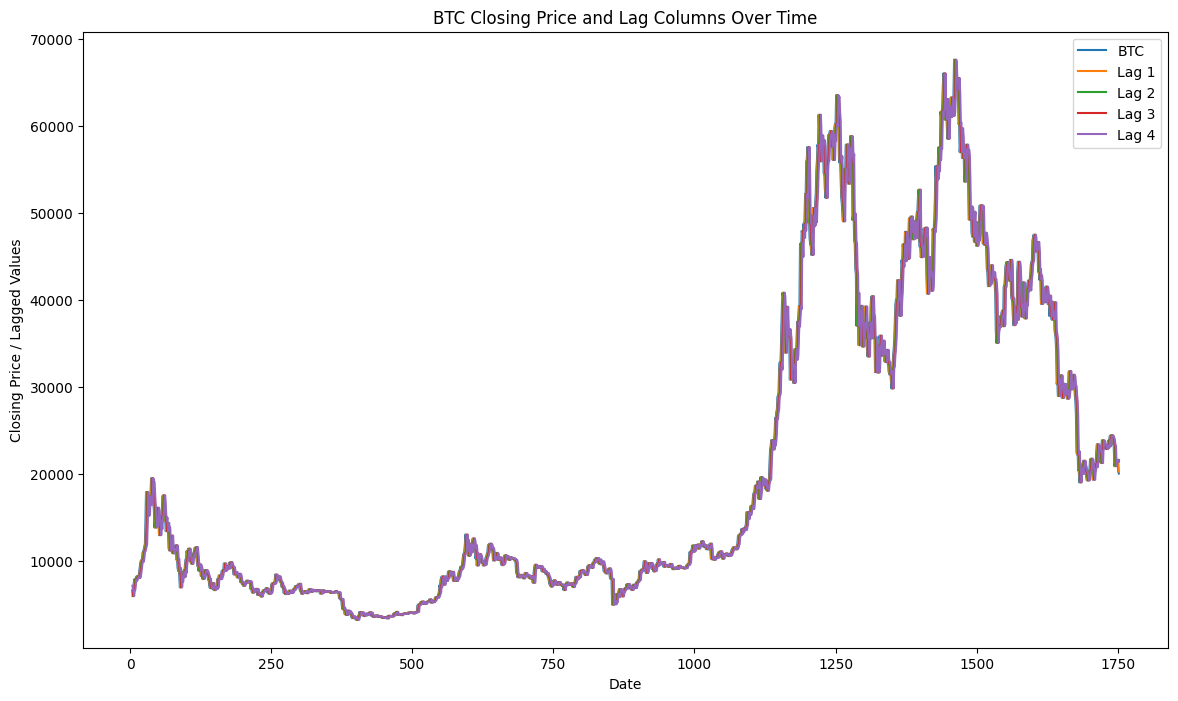

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
plt.plot(df['Close (BTC)'], label='BTC')
plt.plot(df['Close (BTC)_lag_1'], label='Lag 1')
plt.plot(df['Close (BTC)_lag_2'], label='Lag 2')
plt.plot(df['Close (BTC)_lag_3'], label='Lag 3')
plt.plot(df['Close (BTC)_lag_4'], label='Lag 4')

plt.title('BTC Closing Price and Lag Columns Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price / Lagged Values')
plt.legend()
plt.show()



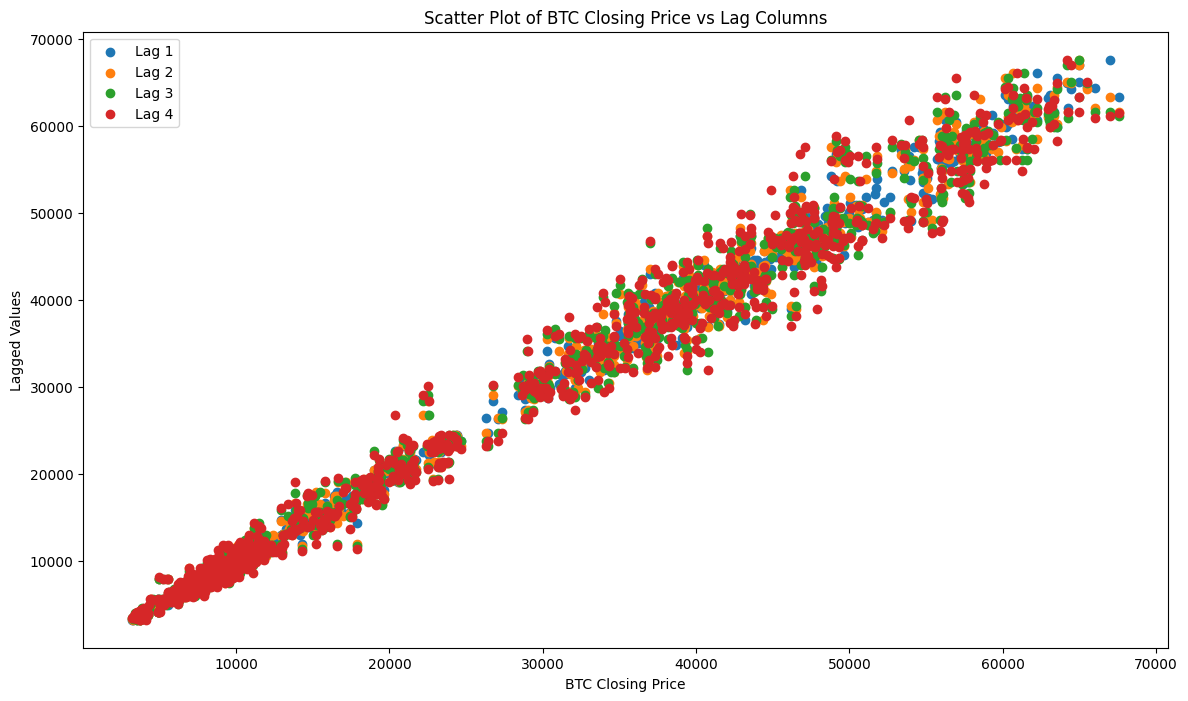

In [ ]:
plt.figure(figsize=(14, 8))
plt.scatter(df['Close (BTC)'], df['Close (BTC)_lag_1'], label='Lag 1')
plt.scatter(df['Close (BTC)'], df['Close (BTC)_lag_2'], label='Lag 2')
plt.scatter(df['Close (BTC)'], df['Close (BTC)_lag_3'], label='Lag 3')
plt.scatter(df['Close (BTC)'], df['Close (BTC)_lag_4'], label='Lag 4')

plt.title('Scatter Plot of BTC Closing Price vs Lag Columns')
plt.xlabel('BTC Closing Price')
plt.ylabel('Lagged Values')
plt.legend()
plt.show()



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

##Искористете соодветен Boosting модел за проблемот и тестирајте го моделот на тестирачкото множество

In [ ]:
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(X_train, y_train)

y_pred_xgb = model.predict(X_test)

In [ ]:
y_pred_xgb

array([47364.86 , 48324.04 , 46097.344, 46650.168, 49243.4  , 47946.84 ,
       49120.797, 49773.08 , 49288.555, 44423.492, 37248.812, 43107.52 ,
       43417.312, 43902.88 , 40340.52 , 41631.324, 41192.152, 40048.43 ,
       39783.348, 41192.152, 45649.88 , 47680.395, 49468.48 , 51541.562,
       52217.83 , 56953.805, 53140.766, 55662.766, 55963.305, 56196.43 ,
       57378.22 , 59103.402, 58456.664, 55591.656, 59295.875, 56969.88 ,
       61870.926, 58462.86 , 58462.86 , 58462.86 , 58462.86 , 58462.86 ,
       58462.86 , 58462.86 , 58462.86 , 58462.86 , 57322.582, 59548.086,
       58360.594, 61811.48 , 58462.86 , 58462.86 , 58462.86 , 58462.86 ,
       58462.86 , 58462.86 , 58462.86 , 58462.86 , 58462.86 , 58462.86 ,
       58462.86 , 58462.86 , 58462.86 , 58462.86 , 58462.86 , 58462.86 ,
       58615.25 , 59548.086, 58654.43 , 59605.508, 56738.812, 56469.34 ,
       57606.305, 55029.01 , 56741.99 , 54079.246, 54435.855, 54961.03 ,
       54671.387, 57792.363, 60672.188, 53514.773, 

##Искористете соодветен Decision Tree модел за проблемот и тестирајте го моделот на тестирачкото множество

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

y_pred_tree = model.predict(X_test)

In [ ]:
y_pred_tree

array([44428.28906, 46717.57813, 45201.45703, 47504.85156, 47945.05859,
       47504.85156, 48847.02734, 49199.87109, 47504.85156, 42909.40234,
       37304.69141, 41626.19531, 46481.10547, 37002.44141, 37002.44141,
       39974.89453, 39974.89453, 39974.89453, 41626.19531, 46365.40234,
       48905.49219, 47096.94531, 51206.69141, 49199.87109, 55888.13281,
       56099.51953, 51762.27344, 54824.70313, 54824.70313, 52774.26563,
       56631.07813, 57828.05078, 58803.77734, 53333.53906, 63314.01172,
       56216.18359, 63109.69531, 63109.69531, 63109.69531, 61572.78906,
       60683.82031, 56216.18359, 63503.45703, 56216.18359, 63109.69531,
       56216.18359, 63503.45703, 63503.45703, 63314.01172, 63109.69531,
       56216.18359, 56216.18359, 63109.69531, 63109.69531, 60683.82031,
       56216.18359, 63109.69531, 63109.69531, 63109.69531, 61572.78906,
       61572.78906, 61572.78906, 61572.78906, 61572.78906, 61572.78906,
       61572.78906, 56216.18359, 63503.45703, 55724.26563, 56473

##Споредете ги резултатите добиени од двата модели со соодветни метрики

In [ ]:
from sklearn.metrics import mean_squared_error

mse_tree = mean_squared_error(y_test, y_pred_tree)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

print(f'Mean Squared Error (Decision Tree): {mse_tree}')
print(f'Mean Squared Error (XGBoost): {mse_xgb}')


Mean Squared Error (Decision Tree): 7395209.762357439
Mean Squared Error (XGBoost): 5839260.75567173
